In [9]:
import pandas as pd
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_dsv_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Split the line into individual values using space as a delimiter
            values = line.strip().split(' ')
            # Convert non-empty values to float and store them in a list
            row = [float(value) if value != '' else None for value in values]
            data.append(row)
    return data

In [6]:
# Replace 'datafile.dat' with the actual path to your .dat file
file_path = r"C:\Users\panda\Downloads\Weighted + AUC Output SVM\Weighted_MNIST_SVM.dat"
file_path = file_path.replace("\\", "/")
list_accuracies = pd.read_csv(file_path, sep = '\s+', header = None)
accuracies = list_accuracies.values.flatten()
accuracies = accuracies[~np.isnan(accuracies)].tolist()
# Now 'data' contains the content of the .dat file as a list of lists
print(accuracies)

[0.51541096, 0.51541096, 0.51541096, 0.51541096, 0.52111872, 0.52092846, 0.51541096, 0.52187976, 0.52187976, 0.52187976, 0.52187976, 0.52739726, 0.52644597, 0.52187976, 0.53120244, 0.53120244, 0.53120244, 0.53120244, 0.54642314, 0.54642314, 0.53120244, 0.51217656, 0.51217656, 0.51217656, 0.51217656, 0.51369863, 0.51350837, 0.51217656, 0.52283105, 0.52283105, 0.52283105, 0.52283105, 0.52644597, 0.52644597, 0.52283105, 0.52454338, 0.52454338, 0.52454338, 0.52454338, 0.52949011, 0.52949011, 0.52454338, 0.52016743, 0.52016743, 0.52016743, 0.52016743, 0.52454338, 0.52454338, 0.52016743, 0.52910959, 0.52910959, 0.52910959, 0.52910959, 0.53710046, 0.53671994, 0.52910959, 0.52454338, 0.52454338, 0.52454338, 0.52454338, 0.52739726, 0.52739726, 0.52454338, 0.52207002, 0.52207002, 0.52207002, 0.52207002, 0.52340183, 0.52340183, 0.52207002, 0.52758752, 0.52758752, 0.52758752, 0.52758752, 0.53082192, 0.53082192, 0.52758752, 0.51959665, 0.51959665, 0.51959665, 0.51959665, 0.52207002, 0.52187976, 0.5

In [7]:
print(file_path)

C:/Users/panda/Downloads/Weighted + AUC Output SVM/Weighted_MNIST_SVM.dat


C:\Users\panda\AppData\Local\Temp\ipykernel_31032\3029183311.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'methods', y = 'accuracies', data = df, jitter = 1, dodge = True, palette = 'Set1', size = 3)


<Axes: xlabel='methods', ylabel='accuracies'>

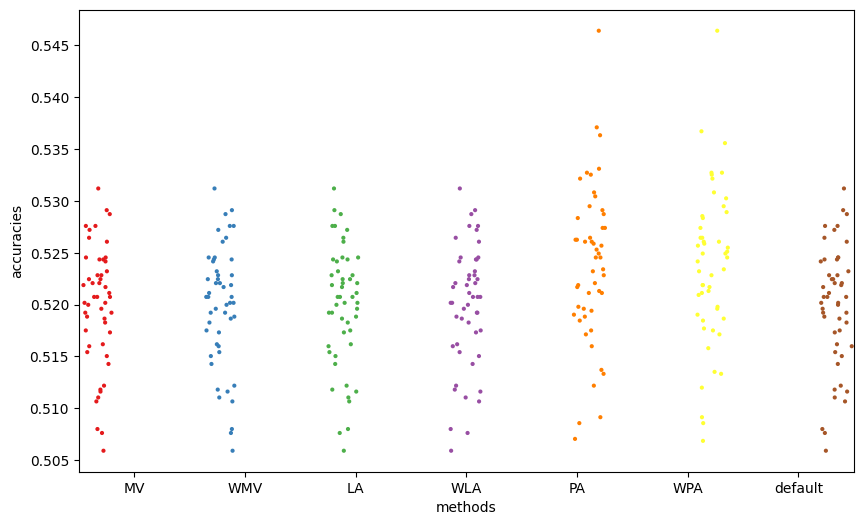

In [8]:
#stripplot
num_repeats = 50
methods = ['MV', 'WMV', 'LA', 'WLA', 'PA', 'WPA', 'default'] 
method_names= [methods[i % len(methods)] for i in range(num_repeats * len(methods))]

data = {'accuracies': accuracies, 'methods' : method_names}
df = pd.DataFrame(data)
    
plt.figure(figsize = (10, 6))
sns.stripplot(x = 'methods', y = 'accuracies', data = df, jitter = 1, dodge = True, palette = 'Set1', size = 3)